In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Preparation

In [3]:
# Data Reading & Cleansing

data = pd.read_csv('data/aol_data.csv')
data = data.transpose()
data = data.reset_index()
data.columns = ['Month', 'Production']
data['Month'] = data['Month'].str.replace('M', '').astype(int)
data

,Month,Production
0,1,1863
1,2,1614
2,3,2570
3,4,1685
4,5,2101
...,...,...
139,140,16782
140,141,16716
141,142,17033
142,143,16896


Scatter Plot as Visualization

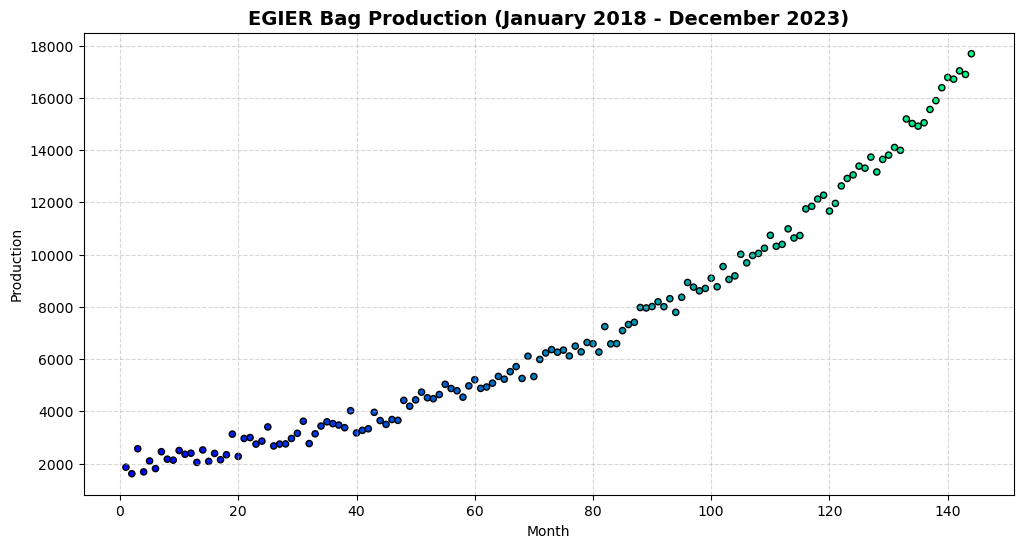

In [ ]:
x = np.array(data['Month'])
y = np.array(data['Production'])

plt.figure(figsize=(12,6))
plt.scatter(x, y, c=x, cmap='winter', edgecolors="black", s=20, alpha=1)
plt.title("EGIER Bag Production (January 2018 - December 2023)", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=10)
plt.ylabel("Production", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1. Polynomial Regression

y = 100.675683x^1 + -141.035645x^0


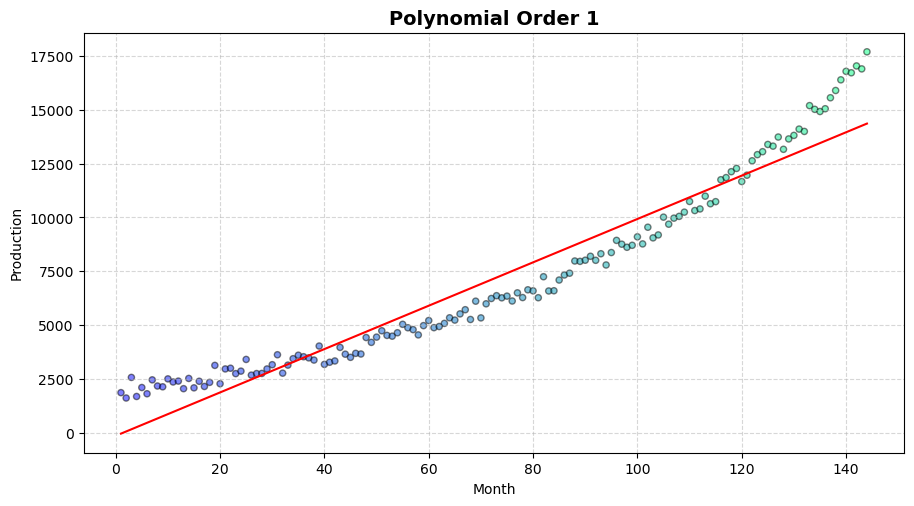

y = 0.705904x^2 + -1.680422x^1 + 2349.629590x^0


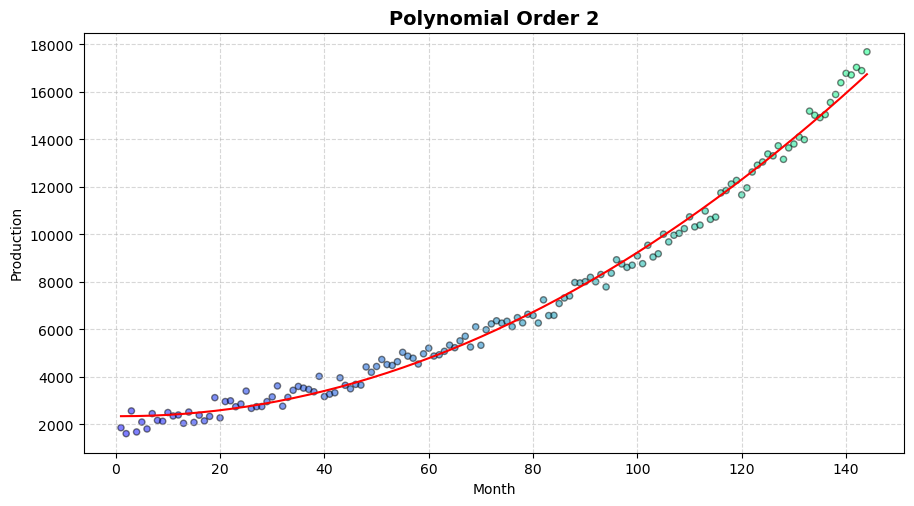

y = 0.003863x^3 + -0.134357x^2 + 47.223553x^1 + 1748.506723x^0


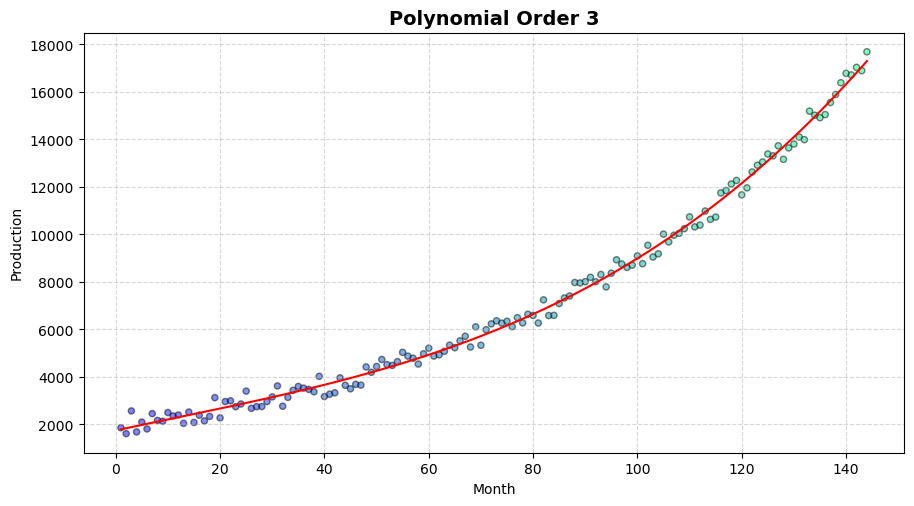

y = 0.000029x^4 + -0.004446x^3 + 0.641969x^2 + 22.005505x^1 + 1937.026376x^0


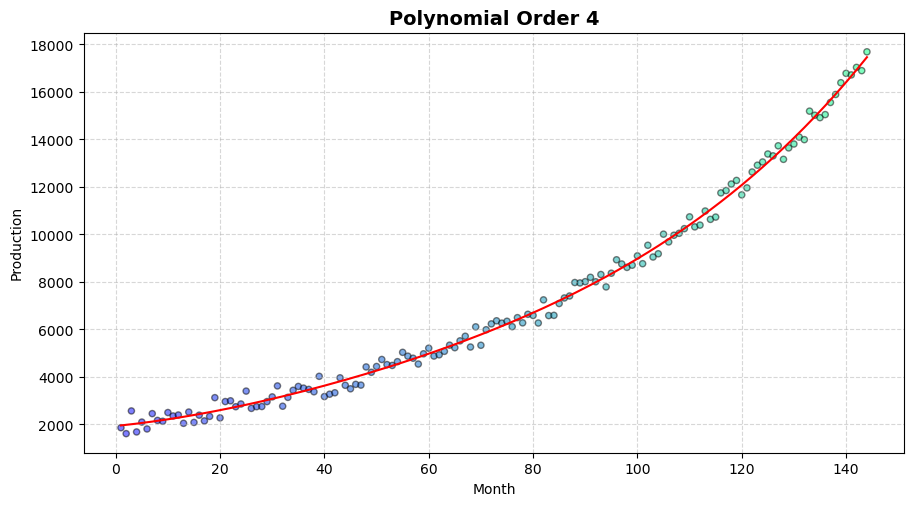

In [69]:
# Using Polynomial Regression

x = np.array(data['Month'])
y = np.array(data['Production'])


for i in range(1,5):
    
    plt.figure(figsize=(36,12))
    plt.subplot(2, 3, i)
    plt.scatter(x, y, c=x, cmap='winter', edgecolors="black", s=20, alpha=0.5)
    
    y_est = np.polyfit(x, y, i)
    
    eq = "y = " + " + ".join([f"{coef:.6f}x^{len(y_est)-j-1}" for j, coef in enumerate(y_est)])
    print(eq)
    
    plt.plot(x, np.polyval(y_est,x), color='red')
    plt.title(f"Polynomial Order {i}", fontsize=14, fontweight='bold')
    plt.xlabel("Month", fontsize=10)
    plt.ylabel("Production", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    

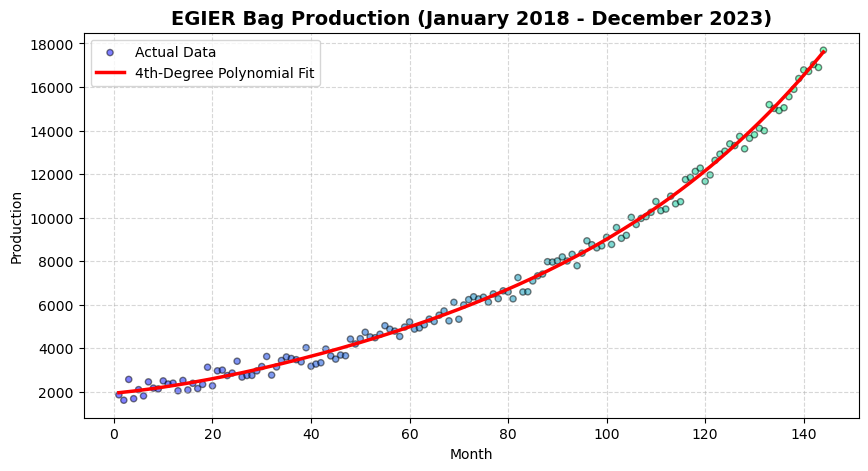

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial coefficients (highest degree first)
coeffs = [0.000029, -0.004446, 0.641969, 22.005505, 1937.026376]

# x-values (months)
x = np.array(data['Month'])
y = np.array(data['Production'])

# predicted y using your polynomial
y_pred = np.polyval(coeffs, x)

# --- Plot ---
plt.figure(figsize=(10,5))
plt.scatter(x, y, c=x, cmap='winter', edgecolors="black", s=20, alpha=0.5, label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=2.5, label='4th-Degree Polynomial Fit')
plt.title("EGIER Bag Production (January 2018 - December 2023)", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=10)
plt.ylabel("Production", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()